# Data Visualization with Whitebox Workflows and matplotlib

## Introduction

This tutorial is part of a series that includes:

- [Tutorial 1: Hydrological Analysis](https://jblindsay.github.io/WhiteboxTutorials/WbW_tutorials/WbW_tutorial1.ipynb)
- [Tutorial 2: Geomorphometric Analysis](https://jblindsay.github.io/WhiteboxTutorials/WbW_tutorials/WbW_tutorial2.ipynb)
- [Tutorial 3: Mapping Building Footprints from LiDAR](https://jblindsay.github.io/WhiteboxTutorials/WbW_tutorials/WbW_tutorial3.ipynb)
- [Tutorial 4: Data visualization with Whitebox Workflows and matplotlib](https://jblindsay.github.io/WhiteboxTutorials/WbW_tutorials/WbW_visualization.ipynb)

The main purpose of Whitebox Workflows is spatial data analysis. However, every data scientist eventually needs to visualize the data that they produce. The `whitebox_workflows.show` function allows users to visualize Whitebox Workflows data, including `Raster`, `Vector` and `Lidar` data types, with high-quality interactive plots by leveraging the powerful [matplotlib](https://matplotlib.org) Python library. 

> Note: The `whitebox_workflows.show` function requires matplotlib. If it is not already installed, WbW will automaticaly install the library using pip.

The following table describes each of the parameters used in this powerful function.


Parameter | Data Type | Optional | Description
--- | --- | --- | ----
`obj` | Raster, Vector, or Lidar | required | Dataset to be displayed on the plot axes. Can be of Raster, Vector or Lidar type.
`ax` | matplotlib.axes.Axes | optional | Axes to plot on, otherwise uses current axes.
`title` | str or dict | optional | Either a string representing the title for the figure, or a dict containing keyword and value pairs sent to the `matplotlib.axes.Axes.set_title` function, e.g. `title='My Title'` `title={'label': 'My Title', 'pad': 12, 'fontsize': 10, 'fontweight': 'bold', 'fontstyle': 'italic'}`
`figsize` | Tuple(float, float) | optional | Defines the size of the figure to which the Axes is to be added.
`skip` | int | optional | Determines the stride for reading Raster and Lidar obj types when displaying. skip=1 indicates that every pixel/point is read, while skip=2 would indicate that every second pixel/point is read. This argument can strongly impact the amount of time required to display the resulting figure but larger values may impact the quality of the resulting image. For larger raster images, values in the range of 2-10 may be advisable while for lidar datasets, values in the range of 500-1000 may be suitable.
`clip_percent` | float | optional | Continuous Raster datasets (i.e. non-RGB images) will use the `Raster.configs.display_min` and `Raster.configs.display_max` values to determine the assignment of colours from the colormap. By default, these values are set to the raster min/max values when the raster is read. If a clip_percent value > 0 is provided, the show function will call the `Raster.clip_display_min_max` function to clip the tails of the raster histogram. Depending on the size of the raster, this function can significantly increase time to display. If the same raster is being added to multiple Axes in a multi-part figure, it may be advisable to only set the clip_percent function (or call the clip_display_min_max seperately) one time.
`plot_as_surface` | bool | optiona, default = False | Continuous Raster datasets can be plotted on a Axes3D using the   [`mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html) function, rather than the usual 2D representation using the [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function when this optional argument is set to True.
`vert_exaggeration` | float | optional | This optional argument determines the vertical exaggeration used in displaying 3D plots for either rasters (plotted with `plot_as_surface=True`) and Lidar datasets. Generally, `vert_exaggeration > 1.0` is advisable and for lower-relief sites, values much larger than 1.0 are likely suitable otherwise the resulting plot may appear quite flat.
`colorbar_kwargs` | key-value pairings | optional | Dictionary of key-value pairs that are sent to the [`matplotlib.pyplot.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) function. These arguments are only used when a `cmap` key exists in the **kwargs argument. That is, leaving this argument unspecified will result in no colorbar being displayed in the resulting image. `ax = show(hs, title='Hillshade', skip=2, cmap='gray', colorbar_kwargs={'location': "right", 'shrink': 0.5}, figsize=(7.0,4.7))`
`**kwargs` | key, value pairings | optional | These will be passed to the [`matplotlib.pyplot.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), [`matplotlib.pyplot.fill`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill.html), [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html), or [`mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html) functions depending on obj type.

The `whitebox_workflows.show` function returns a `matplotlib.axes.Axes`.



Before we begin exploring the usage of the `whitebox_workflows.show` function, we'll need ot ensure that we have the necessary libraries installed, including matplotlib and the latest version of whitebox_workflows.

In [ ]:
# Ensure that matplotlib is installed.
%pip install matplotlib

# Ensure that whitebox_workflows is installed.
%pip install whitebox_workflows -U

> **This demo requires a minimum of Whitebox Workflows v1.3.0, which is not yet publicly released.**

Let's check the version of WbW to ensure that it meets this requirement.

In [1]:
from whitebox_workflows import WbEnvironment

wbe = WbEnvironment()
print(wbe.version())

Whitebox Workflows for Python v1.3.0 by Whitebox Geospatial Inc. 
Developed by Dr. John B. Lindsay, (c) 2022-2024

Description:
Whitebox Workflows for Python is an advanced geospatial data analysis platform 
and Python extension module.


The following install allows for interactive matplotlib widgets within Jupyter.

In [ ]:
%pip install ipympl
%matplotlib widget

## Basic examples
Here is a basic example of the usage of the `whitebox_workflows.show` function, in which we download a sample satellite image data set, combine multiple layers into a colour composite image, and finally use `whitebox_workflows.show` to plot the resulting image:

11429141 bytes downloaded.
Unpacking sample data...


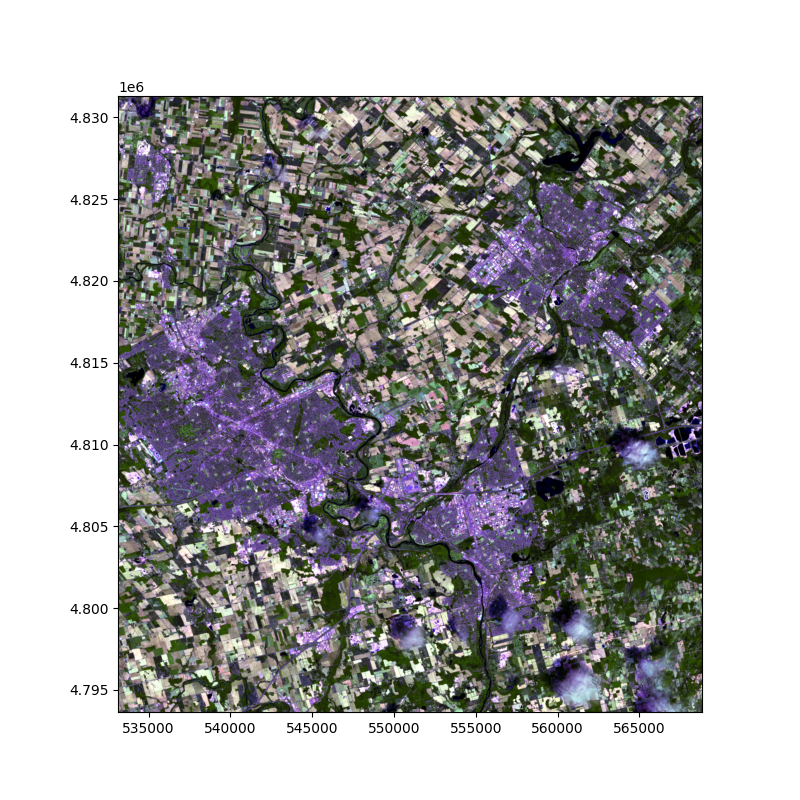

<Axes: >

In [3]:
# Basic raster image example
from whitebox_workflows import download_sample_data, show, WbEnvironment

wbe = WbEnvironment()
wbe.working_directory = download_sample_data('Guelph_landsat')

swir2, swir1, red = wbe.read_rasters('band7.tif', 'band6.tif', 'band4.tif')
image = wbe.create_colour_composite(swir2, swir1, red)

show(image, figsize=(8, 8))

91117172 bytes downloaded.
Unpacking sample data...


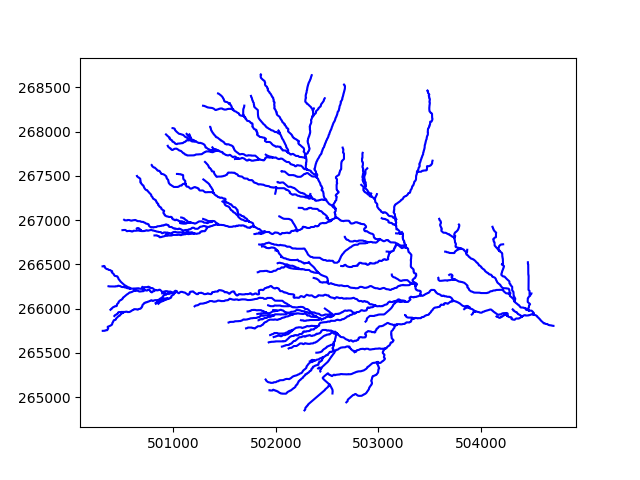

<Axes: >

In [4]:
# Basic vector example
wbe.working_directory = download_sample_data('mill_brook_dem')

streams = wbe.read_vector('streams.shp')
show(streams, color='blue')

## Adding multiple layers to a plot

In the basic example above, we simply called the `whitebox_workflows.show` function, specifying the data layer that we wanted to display and the desired figure size. Notice that we did not assign the output of the function to a variable. The `whitebox_workflows.show` takes an optional `matplotlib.axes.Axes` as an input (`ax` argument) and similarly outputs an `Axes` as well. If we don't specify the `ax` argument, then the `whitebox_workflows.show` function will create its own instance of a `matplotlib.axes.Axes` to plot the data to. However, we can use this characteristic of the function to repeatedly add new layers to an existing plot. The following script is a more advanced example that takes advantage of this feature to create a map with several layers, including both raster and vector data layers:

91117172 bytes downloaded.
Unpacking sample data...


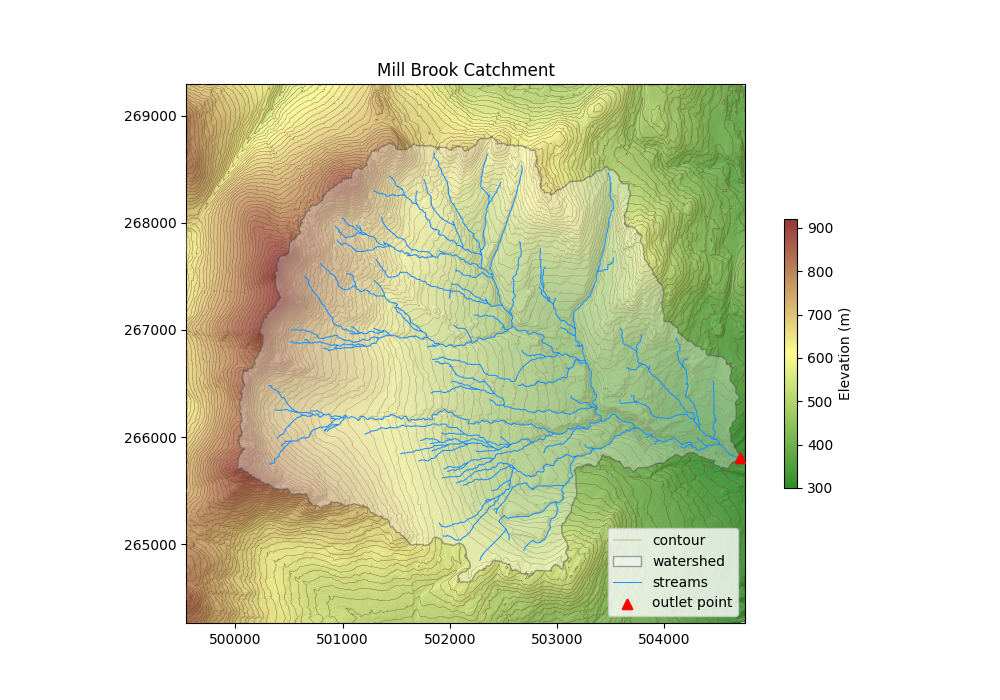

In [5]:
# Advanced whitebox_workflows.show example
from whitebox_workflows import WbPalette
import matplotlib.pyplot as plt

wbe.working_directory = download_sample_data('mill_brook_dem')

# Read in some files
dem = wbe.read_raster('dem.tif')
streams = wbe.read_vector('streams.shp')
watershed = wbe.read_vector('watershed.shp')
outlet = wbe.read_vector('outlet.shp')
contours = wbe.read_vector('contours.shp')

# Create a hillshade image from the DEM
hillshade = wbe.hillshade(dem)

# Let's make a pretty map with many layers
fig, ax = plt.subplots()

ax = show(dem, ax=ax, title='Mill Brook Catchment', cmap=WbPalette.Earthtones, figsize=(10,7), skip=2, colorbar_kwargs={'label': 'Elevation (m)', 'location': "right", 'shrink': 0.5}, zorder=1)
ax = show(hillshade, ax=ax, cmap='grey', clip_percent=10.0, skip=2, alpha=0.15, zorder=2)
ax = show(contours, ax=ax, color=(0.447, 0.306, 0.173), linewidth=0.25, label='contour', zorder=3)
ax = show(watershed, ax=ax, color=(1.0, 1.0, 1.0, 0.3), edgecolor=(0.3, 0.3, 0.3, 0.5), linewidth=1.0, label='watershed', zorder=4)
ax = show(streams, ax=ax, color='dodgerblue', linewidth=0.75, label='streams', zorder=5)
ax = show(outlet, ax=ax, marker='^', s=43, color=(1.0, 0.0, 0.0), linewidth=1.75, label='outlet point', zorder=6)

# set axes range
ax.set_xlim([dem.configs.west, dem.configs.east])
ax.set_ylim([dem.configs.south, dem.configs.north])

ax.legend() 

plt.show()

Notice that the hillshade raster has been transparently overlayed on top of the DEM in each of the subplots. The call to `ax.legend()` adds a legend box for each of the vector data layers. You may use the full matplotlib to adjust individual plot features such as the placement of the legend box, fonts, etc.

# Colour palettes
The `cmap` argument determines which colour palette (or [`colormap`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.colormaps) in the language of matplotlib) is used to render continuous raster images, such as digital elevation models (DEMs), and Lidar data sets. Users may select any of the [matplotlib standard colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) or any of the Whitebox palettes contained within the `WbPalette` class.
For example, the following script renders a DEM using a range of terrain-specific palettes.

23016912 bytes downloaded.
Unpacking sample data...


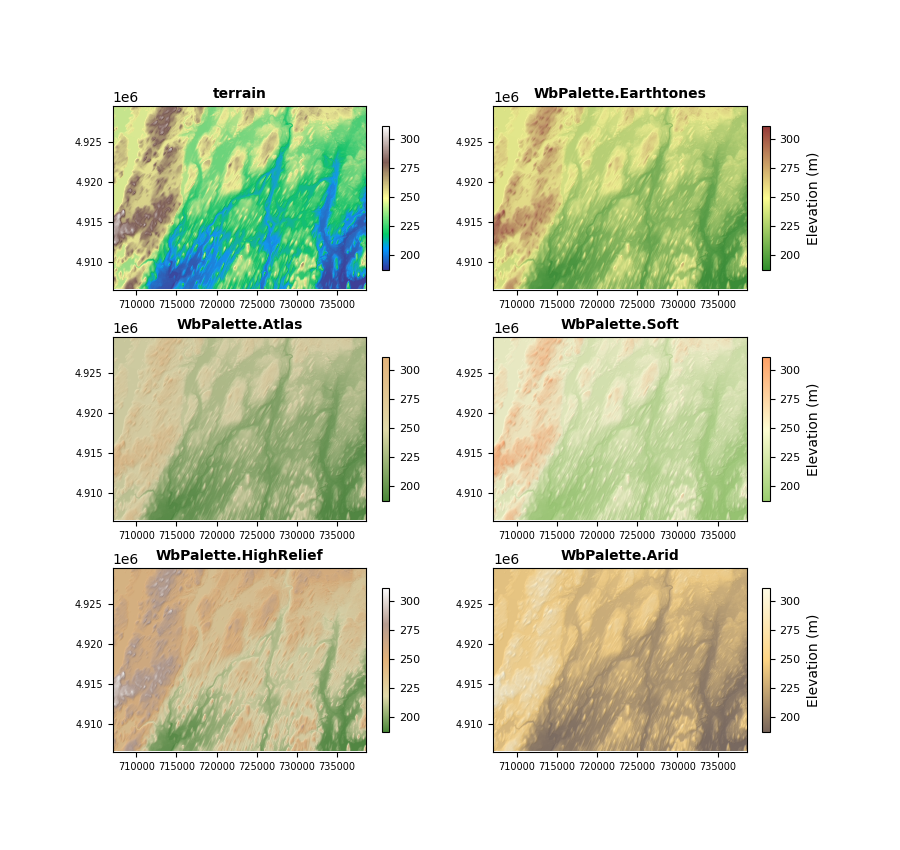

In [6]:
import matplotlib.pyplot as plt

# cmap example with multiple subplots
wbe.working_directory = download_sample_data('peterborough_drumlins')

dem = wbe.read_raster('peterborough_drumlins.tif')
hillshade = wbe.hillshade(dem)
hillshade.clip_display_min_max(2.0)

rows = 3
columns = 2
fig, ax = plt.subplots(rows, columns)
fig.set_size_inches(9.0, 8.5)

# Notice 'terrain' is a standard matplotlib colormap while the other listed palettes are standard to Whitebox.
# Each of the following are particularly well suited to rendering elevation data.
colormaps = ['terrain', WbPalette.Earthtones, WbPalette.Atlas, WbPalette.Soft, WbPalette.HighRelief, WbPalette.Arid]
i = 0
for r in range(rows):
    for c in range(columns):
        if c < columns-1:
            ax[r,c] = show(dem, title={'label': colormaps[i], 'fontsize': 10, 'fontweight': 'bold'}, ax=ax[r,c], cmap=colormaps[i], skip=2, colorbar_kwargs={'location': 'right', 'shrink': 0.75})
        else:
            ax[r,c] = show(dem, title={'label': colormaps[i], 'fontsize': 10, 'fontweight': 'bold'}, ax=ax[r,c], cmap=colormaps[i], skip=2, colorbar_kwargs={'location': "right",  'shrink': 0.75, 'label': 'Elevation (m)'})

        ax[r,c] = show(hillshade, ax=ax[r,c], cmap='grey', skip=2, alpha=0.15)
        ax[r,c].tick_params(axis='both', labelsize=7)
        im = ax[r,c].images
        cb = im[0].colorbar
        cb.ax.tick_params(labelsize=8)
        i+=1

plt.show()

## 3D surface plots
The `whitebox_workflows.show` function can also be used to create interactive 3D surface plots from raster DEMs by setting the `plot_as_surface` argument to True and specifying an `obj` that is a continuous raster data type. For example:

91117172 bytes downloaded.
Unpacking sample data...


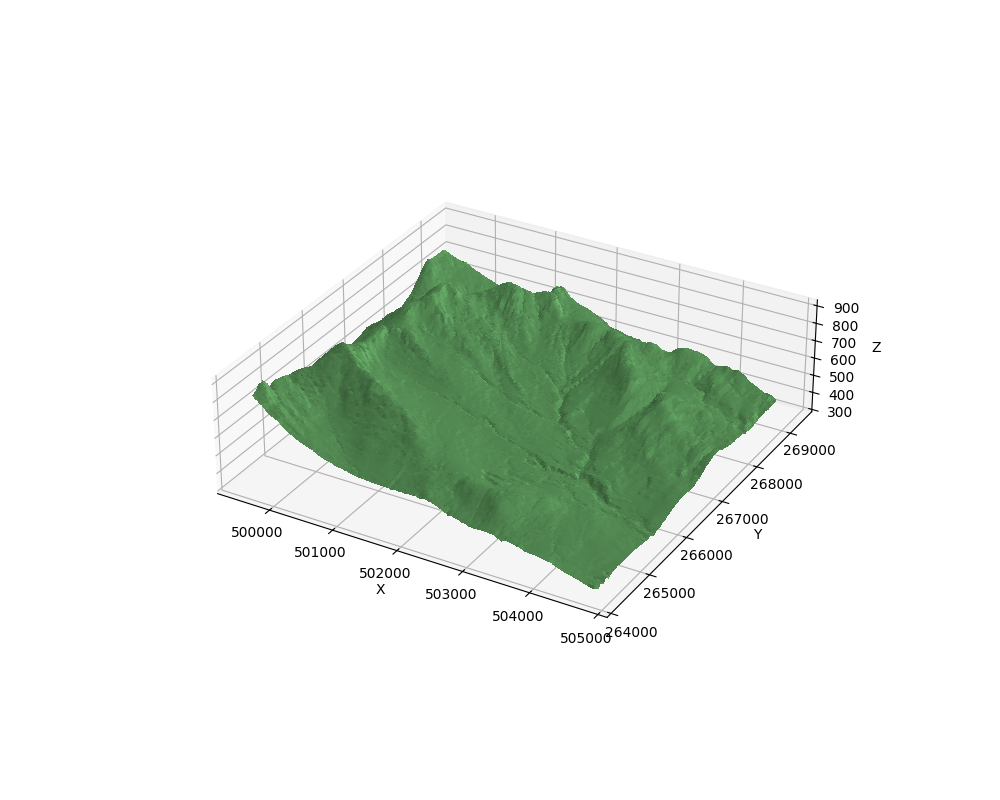

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

In [7]:
# 3D surface plots example
wbe.working_directory = download_sample_data('mill_brook_dem')

dem = wbe.read_raster('dem.tif')
show(
    dem, 
    figsize=(10,8),
    skip=2,
    plot_as_surface=True, 
    vert_exaggeration = 2.5,
    color='lightgreen',
    shade=True,
    linewidth=0.0, 
    rcount=175, # default is 50 rows and columns for grid
    ccount=175,
    antialiased=False
)

Set the `cmap` and `colorbar_kwargs` arguments to render the surface elevations using a palette and add a side color bar.

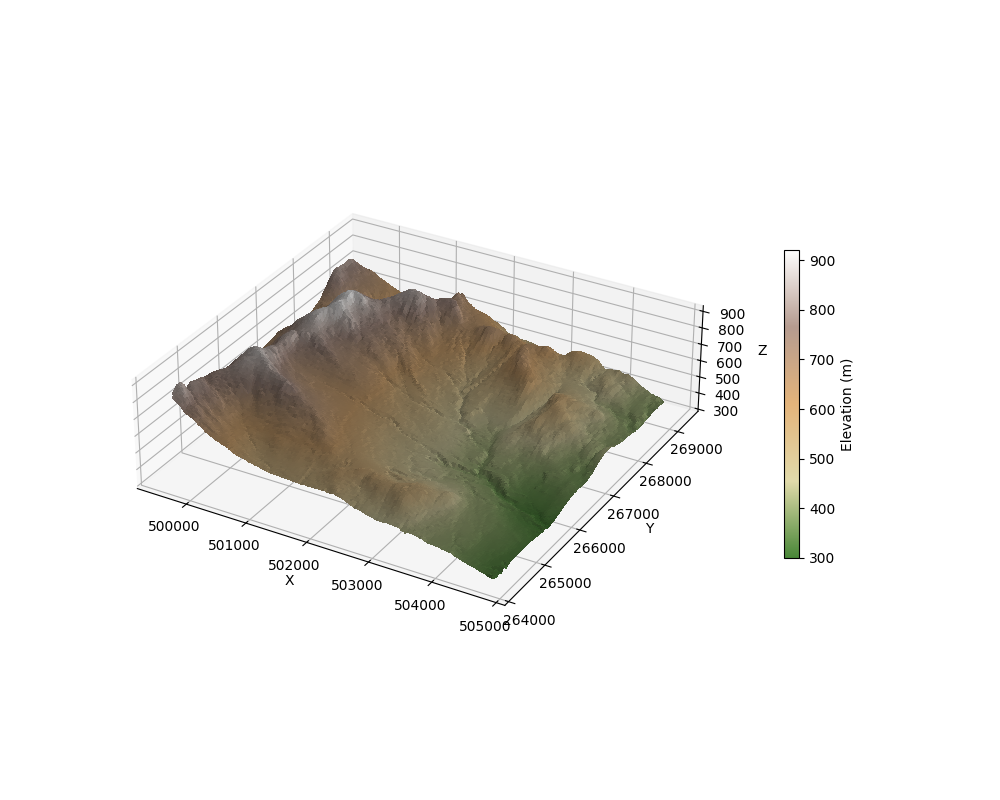

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

In [10]:
show(
    dem,    
    figsize=(10,8),
    skip=2,
    plot_as_surface=True, 
    vert_exaggeration = 2.5,
    colorbar_kwargs={'location': "right",  'shrink': 0.5, 'label': 'Elevation (m)', 'pad' : 0.1},
    cmap=WbPalette.HighRelief,
    shade=True,
    linewidth=0.0, 
    rcount=175, # default is 50 rows and columns for grid
    ccount=175,
    antialiased=False
)

By setting the `alpha=0.0` and the `edgecolors` argument, you can create a wire-frame mesh:

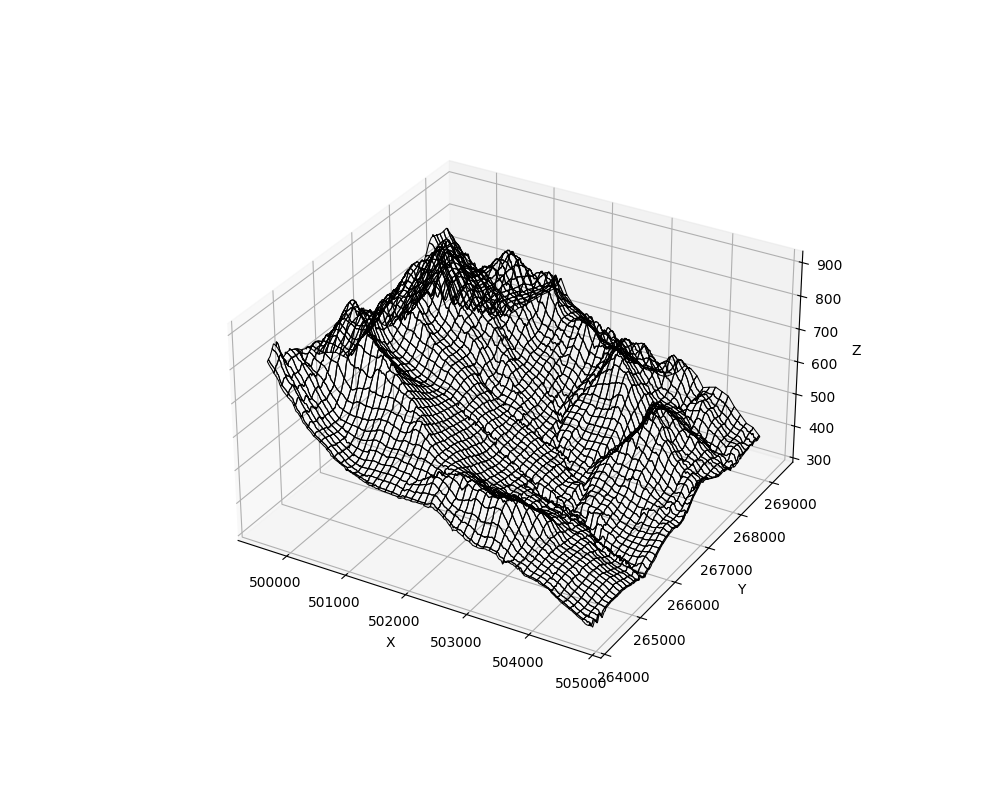

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

In [11]:
# A mesh grid example
show(dem, plot_as_surface=True, figsize=(10,8), skip=2, vert_exaggeration=5.0, alpha=0.0, linewidth=0.75, edgecolors='black')

## Plotting lidar point clouds
Visualizing lidar data sets works in a similar way to 3D surface plots.

52347065 bytes downloaded.
Unpacking sample data...


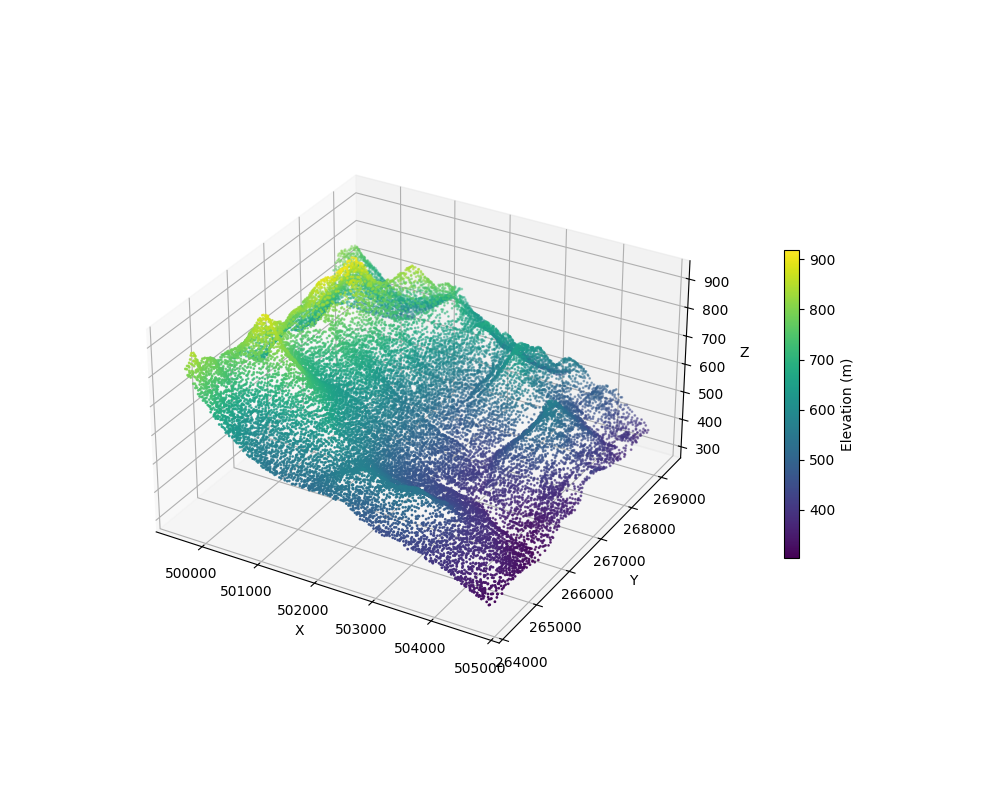

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

In [13]:
# 3D lidar point cloud example
wbe.working_directory = download_sample_data('mill_brook')
lidar = wbe.read_lidar('mill_brook.laz')

show(
    lidar, 
    figsize=(10,8), 
    skip=500, 
    vert_exaggeration=5.0, 
    marker='o', 
    s=1, 
    cmap='viridis', 
    colorbar_kwargs={'location': 'right',  'shrink': 0.5, 'label': 'Elevation (m)', 'pad': 0.1}
)

If you don't want the axes to be visible, you can change the script so that they are no longer rendered.

In [ ]:
# 3D lidar point cloud example with no axes

# Let's create our own custom axes (ax) to pass to the show function
fig = plt.figure()
fig.set_dpi(180.0) # Let's make this figure higher resolution.
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_axis_off() # This line ensures that axes will not be rendered

show(
    lidar, 
    ax=ax, # pass our axes here
    figsize=(10,8), 
    skip=100, # and plot with higher point density
    vert_exaggeration=5.0, 
    marker='o', 
    s=0.25, # higher point density might need smaller points
    cmap='viridis', 
    colorbar_kwargs={'location': 'right',  'shrink': 0.5, 'label': 'Elevation (m)', 'pad': 0.0}
)

plt.show()